In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
%matplotlib inline

import cv2

# Calculate the Basis Functions for an M x N Matrix

In [2]:
def basis_function(M, N):    
    basis = np.zeros((M, N, M*N))
    i = 0 
    for p in range(M):
        for q in range(N):
            
            if p == 0:
                ap = 1 / np.sqrt(M)
            else:
                ap = np.sqrt(2 / M)

            if q == 0:
                aq = 1 / np.sqrt(N)
            else:
                aq = np.sqrt(2 / N)
                
            for m in range(M):
                for n in range(N):
                    one = np.cos((np.pi * (2 * m + 1) * p) / (2 * M))
                    two = np.cos((np.pi * (2 * n + 1) * q) / (2 * N))
            
                    result = ap * aq * one * two
                
                    basis[n, m, i] = result
                    
            i += 1
    return basis
    

In [58]:
basis_functions = basis_function(16, 16)

# Visualize Basis Functions for 16 x 16 DCT

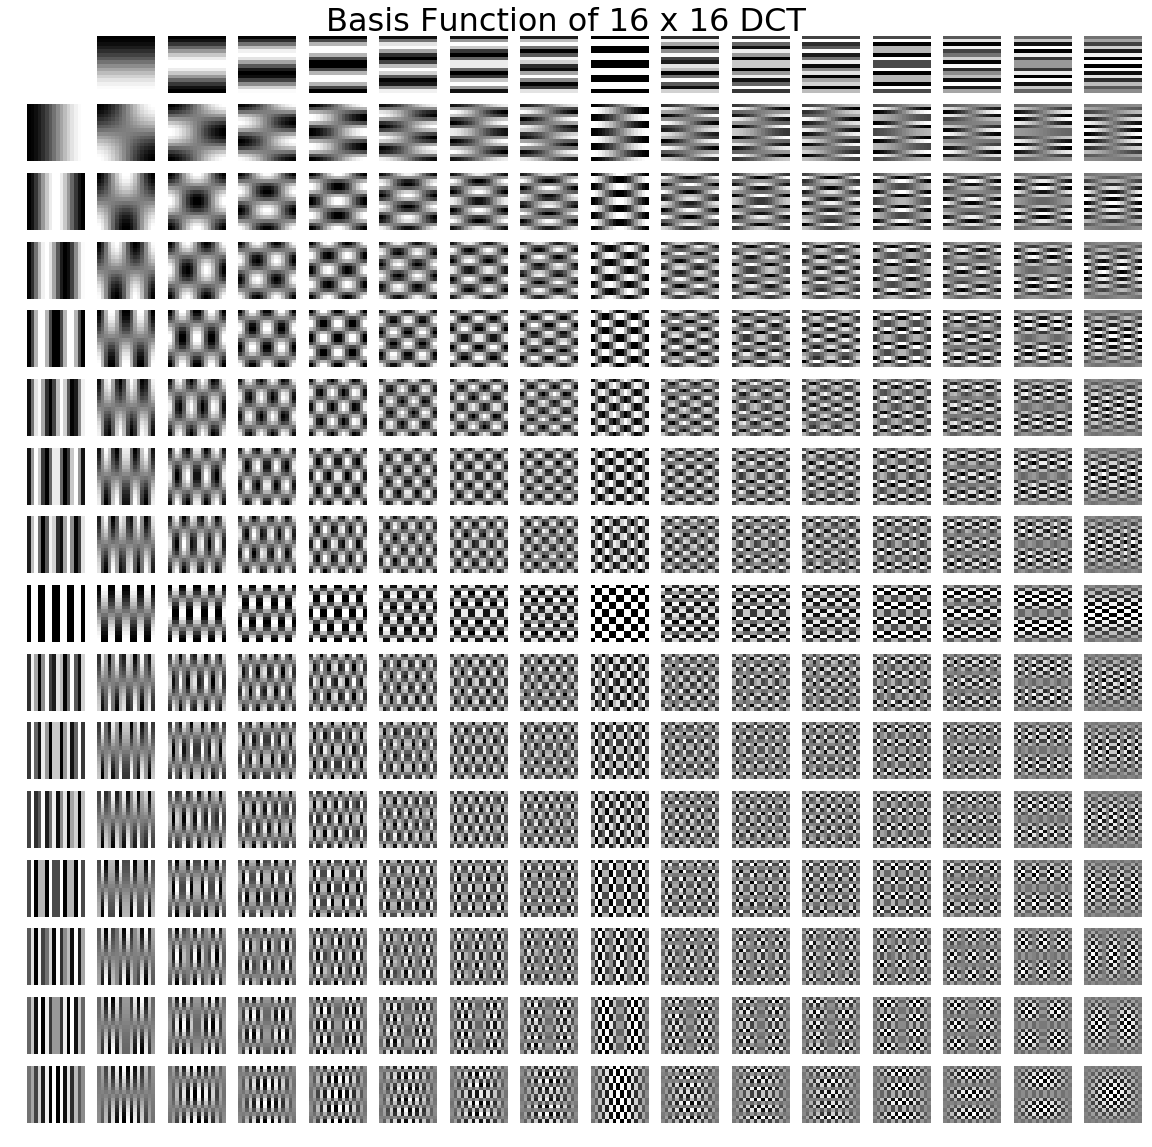

In [59]:
plt.figure(figsize=(20, 20))
for i in range(0, 256):
    plt.subplot(16, 16, i + 1)
    image = basis_functions[:, :, i]
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    
plt.suptitle('Basis Function of 16 x 16 DCT', y = 0.9, size = 32)  
plt.show();

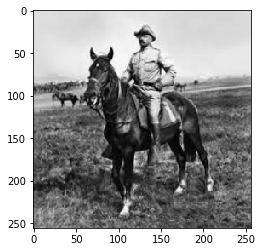

In [60]:
image = cv2.imread('img/ex.jpg')
image = cv2.resize(image, (256, 256))[:, :, 2]
plt.imshow(image, cmap='gray')

In [61]:
M = N = 16
tiles = [image[x:x+M,y:y+N] for x in range(0,image.shape[0],M) for y in range(0,image.shape[1],N)]

In [65]:
tiles[0].shape

(16, 16)

In [44]:
r = np.zeros((256, 256))
for x in range(0, 256, 16):
    for y in range(0, 256, 16):
        r[x:x+M, y:y+M] = tiles[int(x + y/16)]

In [68]:
t = np.zeros((16, 16, 256, 256))
for i, tile in enumerate(tiles):
    for j in range(256):
        t[:, :, i, j] = tile * basis_functions[:, :, j]

In [83]:
def view_dct(level, transformed):
    tiles = transformed[:, :, :, level]
    r = np.zeros((256, 256))
    M = 16
    N = 16
    for x in range(0, 256, 16):
        for y in range(0, 256, 16):
            r[x:x+M, y:y+N] = tiles[:, :, int(x + y/16)]
    return r

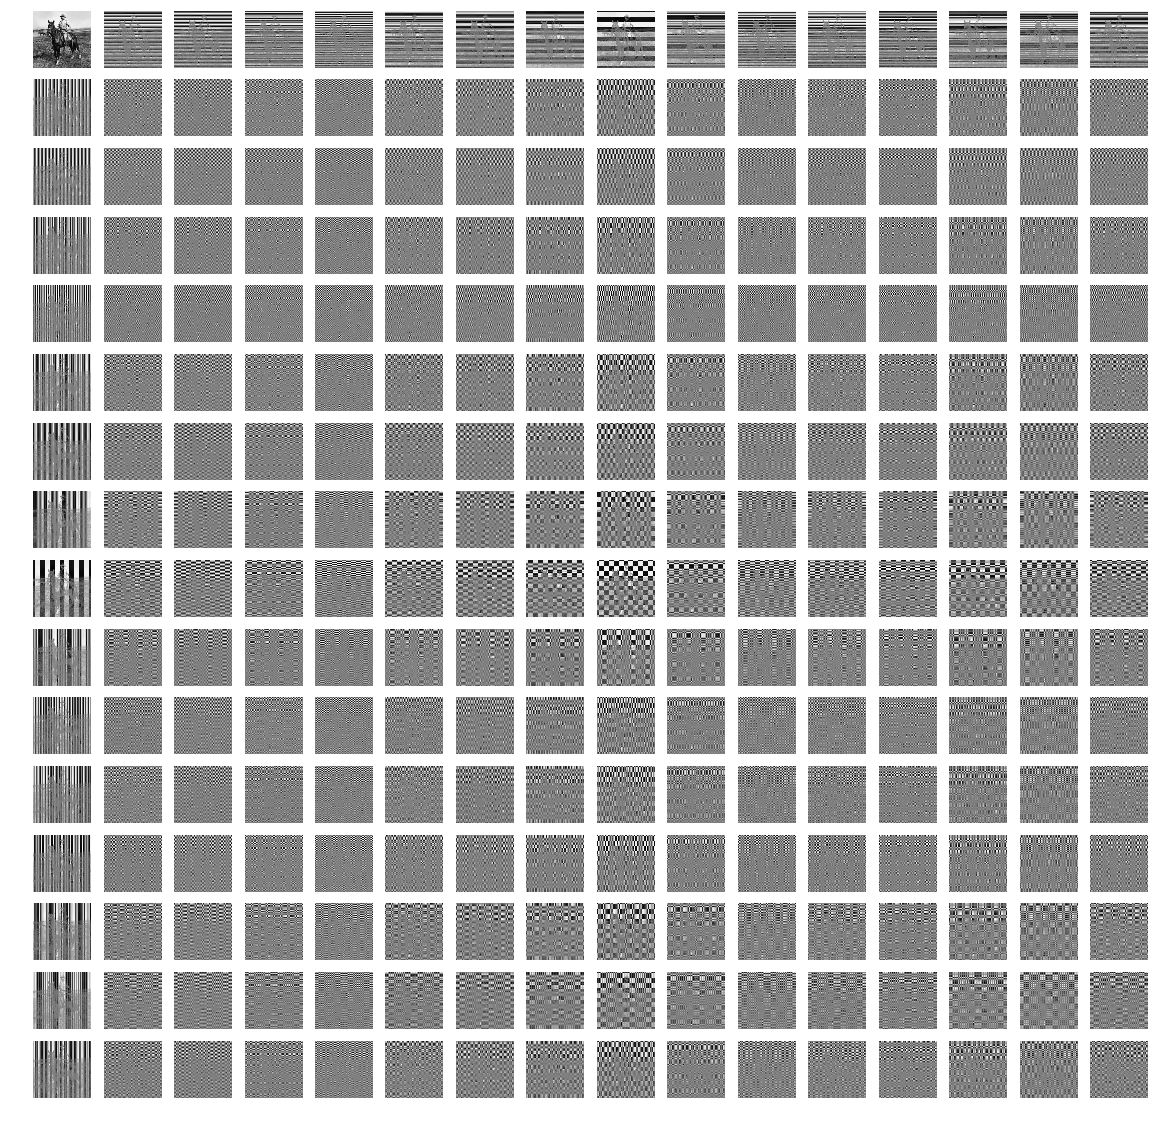

In [85]:
complete_image = np.zeros((256, 256))
plt.figure(figsize=(20, 20))
for i in range(256):
    r = view_dct(i, t)
    plt.subplot(16, 16, i + 1)
    plt.axis('off')
    plt.imshow(r, cmap='gray')
    complete_image += r
plt.show();

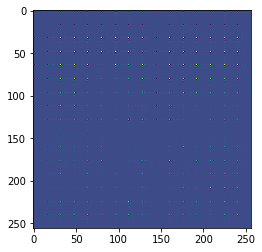

In [86]:
plt.imshow(complete_image)

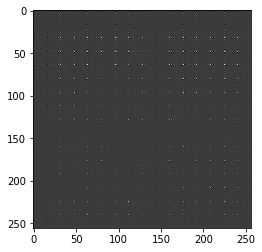

In [93]:
plt.imshow(((complete_image - np.min(complete_image)) / (np.max(complete_image) - np.min(complete_image))) * 255, cmap = 'gray')

In [97]:
((complete_image - np.min(complete_image)) / (np.max(complete_image) - np.min(complete_image)) * 255).shape

(256, 256)

In [98]:
image.shape

(256, 256)

In [1]:
complete_image[0]

NameError: name 'complete_image' is not defined